Init Coords
[-0.5280268] [1.2004454]
[1.3972905] [-0.5406154]
[-1.0590502] [-0.7228265]
[0.89776134] [1.3459381]
[1.1515703] [3.494398]
Step 0: loss_history = -5.208138465881348
Step 100: loss_history = -5.412669658660889
Step 200: loss_history = -5.529839515686035
Step 300: loss_history = -5.638058662414551
Step 400: loss_history = -5.744142532348633
Step 500: loss_history = -5.850022315979004
Step 600: loss_history = -5.956350803375244
Step 700: loss_history = -6.0633544921875
Step 800: loss_history = -6.171132564544678
Step 900: loss_history = -6.27971076965332
Step 1000: loss_history = -6.389074325561523
Step 1100: loss_history = -6.4992356300354
Step 1200: loss_history = -6.610206604003906
Step 1300: loss_history = -6.721993446350098
Step 1400: loss_history = -6.8345947265625
Step 1500: loss_history = -6.948007583618164
Step 1600: loss_history = -7.06223201751709
Step 1700: loss_history = -7.1772637367248535
Step 1800: loss_history = -7.293109893798828
Step 1900: loss_history = -7

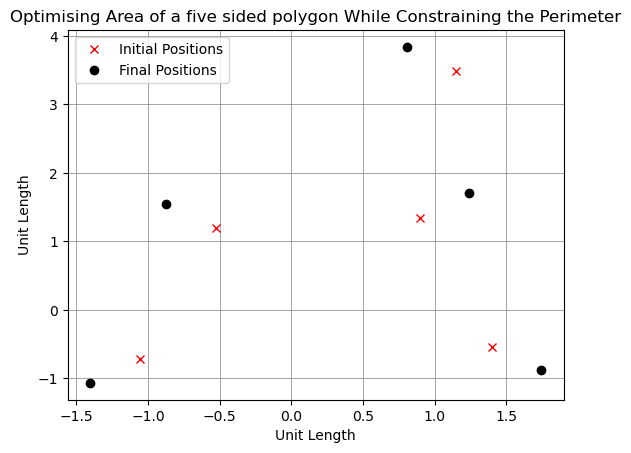

In [4]:
import torch
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch import sqrt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display

if False:
    x1 = Variable(torch.randn(1)*1, requires_grad=True)
    y1 = Variable(torch.randn(1)*1, requires_grad=True)
    x2 = Variable(torch.randn(1)*1, requires_grad=True)
    y2 = Variable(torch.randn(1)*1, requires_grad=True)

    x3 = Variable(-x1, requires_grad=True)
    y3 = Variable(-y1, requires_grad=True)
    x4 = Variable(-x2, requires_grad=True)
    y4 = Variable(-y2, requires_grad=True)
else:
    x1 = Variable(torch.randn(1)*1, requires_grad=True)
    y1 = Variable(torch.randn(1)*1, requires_grad=True)
    x2 = Variable(torch.randn(1)*1, requires_grad=True)
    y2 = Variable(torch.randn(1)*1, requires_grad=True)
    x3 = Variable(torch.randn(1)*1, requires_grad=True)
    y3 = Variable(torch.randn(1)*1, requires_grad=True)
    x4 = Variable(torch.randn(1)*1, requires_grad=True)
    y4 = Variable(torch.randn(1)*1, requires_grad=True)
    x5 = Variable(torch.randn(1)*1, requires_grad=True)
    y5 = Variable(torch.randn(1)*1, requires_grad=True)

plt.plot(x1.detach().numpy(), y1.detach().numpy(), 'x', color='red',label="Initial Positions")
plt.plot(x2.detach().numpy(), y2.detach().numpy(), 'x', color='red')
plt.plot(x3.detach().numpy(), y3.detach().numpy(), 'x', color='red')
plt.plot(x4.detach().numpy(), y4.detach().numpy(), 'x', color='red')
plt.plot(x5.detach().numpy(), y5.detach().numpy(), 'x', color='red')

print("Init Coords")

print(x1.detach().numpy(),y1.detach().numpy())
print(x3.detach().numpy(),y3.detach().numpy())
print(x2.detach().numpy(),y2.detach().numpy())
print(x4.detach().numpy(),y4.detach().numpy())
print(x5.detach().numpy(),y5.detach().numpy())


# Define the function he area 
def compute_area(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5):
    

    #d1 = ((x1 - x3),(y1 - y3)) 
    #d2 = ((x2 - x4),(y2 - y4))

    #d1 x d2 = (((x1 - x3),(y1 - y3)) x ((x2 - x4),(y2 - y4)))
    #d1 x d2 = ((x1 - x3)*(y2 - y4))-((y1 - y3)*(x2 - x4))
   # d1 x d2 =  x1*y2 -x1*y4 -x3*y2 + x3*y4 -y1*x2 +y1*x4 +y3*x2 -y3*x4

   #  area = 0.5 * |x1*y2 -x1*y4 -x3*y2 + x3*y4 -y1*x2 +y1*x4 +y3*x2 -y3*x4|

    return 0.5 * torch.abs((x1*y2 - y1*x2)+(x2*y3 - y2*x3)+(x3*y4 -y3*x4)+(x4*y5-y4*x5)+(x5*y1-y5*x1))
   
    #0.5*(torch.abs(x1*y2 -x1*y4 -x3*y2 + x3*y4 -y1*x2 +y1*x4 +y3*x2 -y3*x4))

    #(0.5 * ((torch.sqrt((x3 - x1)**2+(y3 - y1)**2)) *(torch.sqrt((x4 - x2)**2+(y4 - y2)**2))))

def compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4 ,x5 ,y5):
   
    s1 = torch.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    s2 = torch.sqrt((x3 - x2)**2 + (y3 - y2)**2)
    s3 = torch.sqrt((x4 - x3)**2 + (y4 - y3)**2)
    s4 = torch.sqrt((x5 - x4)**2 + (y5 - y4)**2)
    s5 = torch.sqrt((x1 - x5)**2 + (y1 - y5)**2)
    return s1 + s2 + s3 + s4 + s5

# Define the optimizer (we are using stochastic gradient descent)
optimizer = optim.RMSprop([x1, y1, x2, y2, x3, y3, x4, y4, x5, y5], lr=.0001)
#Adam
#SGD  momentum=0
#RMSprop

# Number of steps in the optomisation
steps = 3300

# perimeter constraint...limmited to 100 units
max_perimeter = 100

#loss_history = [] #collecting the value of the loss function for each interation 

loss_history = []

# Optimization loop
for step in range(steps):
    # Compute area
    area = compute_area(x1, y1, x2, y2, x3, y3, x4, y4,x5,y5)
    
    # Compute perimeter
    perimeter = compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4,x5,y5)
    
    # apply a penalty if peremter of 100 units is exceeded (not really confindent in this step and the next step)
    perimeter_penalty = (torch.max(torch.tensor(0.), ((perimeter)**2 - (max_perimeter)**2))) #hmmmm
    
    # loss function
    loss = (-area) + perimeter_penalty**1
    #(-area) + perimeter_penalty**1
    #(torch.log((1/area) + 1*perimeter_penalty**2))
    #(torch.log(1/area) + perimeter_penalty**1)  # hmmmm
    #loss = -area + perimeter_penalty**1
    # 2*perimeter_penalty - area
    
    
    # Zero gradients
    optimizer.zero_grad()
    
    # Compute gradients
    loss.backward()
    
    # Update parameters
    optimizer.step()

    loss_history.append(loss.item())

    if step % 100 == 0:
        print(f'Step {step}: loss_history = {loss.item()}') # Prints a value for loss function once every hundred iterations



# optomised coords
optimized_x1 = x1.item()
optimized_y1 = y1.item()
optimized_x2 = x2.item()
optimized_y2 = y2.item()
optimized_x3 = x3.item()
optimized_y3 = y3.item()
optimized_x4 = x4.item()
optimized_y4 = y4.item()
optimized_x5 = x5.item()
optimized_y5 = y5.item()


# Print the optimized coords, area and perimeter (should be a square)
print("Optimized Coordinates:")
print("Vertex 1: ({}, {})".format(optimized_x1, optimized_y1))
print("Vertex 2: ({}, {})".format(optimized_x2, optimized_y2))
print("Vertex 3: ({}, {})".format(optimized_x3, optimized_y3))
print("Vertex 4: ({}, {})".format(optimized_x4, optimized_y4))
print("Vertex 5: ({}, {})".format(optimized_x5, optimized_y5))
print("Optimized Perimeter: {:.4f}".format(compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4 ,x5, y5).item()))
print("Optimized Area: {:.4f}".format(compute_area(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5).item()))
print("Theoretical maximum = 688.19")



plt.plot(x1.item(), y1.item(), 'o', color='black',label="Final Positions")
plt.plot(x2.item(), y2.item(), 'o', color='black')
plt.plot(x3.item(), y3.item(), 'o', color='black')
plt.plot(x4.item(), y4.item(),'o', color='black')
plt.plot(x5.item(), y5.item(),'o', color='black')
plt.title("Optimising Area of a five sided polygon While Constraining the Perimeter")
plt.xlabel("Unit Length")
plt.ylabel("Unit Length")
plt.legend()
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.savefig("5_init_final_positions_RMSprop_330000its_lr0.0001.pdf")

point1 = [x1.item(), y1.item()]
point2 = [x2.item(), y2.item()]
point3 =[x3.item(), y3.item()]
point4 = [x4.item(), y4.item()]
point5 = [x5.item(), y5.item()]


#x_values_12 = [point1[0], point2[0]]
#y_values_12 = [point1[1], point2[1]]

#x_values_13 = [point1[0], point3[0]]
#y_values_13 = [point1[1], point3[1]]

#x_values_23 = [point2[0], point3[0]]
#y_values_23 = [point2[1], point3[1]]



#plt.plot(x_values_13, y_values_13, linestyle="--")
#plt.plot(x_values_12, y_values_12, linestyle="--")
#plt.plot(x_values_23, y_values_23, linestyle="--")


#x_values_42 = [point4[0], point2[0]]
#y_values_42 = [point4[1], point2[1]]

#x_values_43 = [point4[0], point3[0]]
#y_values_43 = [point4[1], point3[1]]

#x_values_23 = [point2[0], point3[0]]
#y_values_23 = [point2[1], point3[1]]


#plt.plot(x_values_13, y_values_13, linestyle="--" ,color='red',linewidth=.5)
#plt.plot(x_values_12, y_values_12, linestyle="--" ,color='red')
#plt.plot(x_values_23, y_values_23, linestyle= "--", linewidth = "2" ,color='red')

#plt.plot(x_values_43, y_values_43, linestyle="--", color='green')
#plt.plot(x_values_42, y_values_42, linestyle="--", color='green',linewidth=.5)
#plt.plot(x_values_23, y_values_23, linestyle="--" ,color='green')

#plt.plot(x1.detach().numpy(), y1.detach().numpy(), 'o', color='pink')
#plt.plot(x2.detach().numpy(), y2.detach().numpy(), 'o', color='pink')
#plt.plot(x3.detach().numpy(), y3.detach().numpy(), 'o', color='pink')
#plt.plot(x4.detach().numpy(), y4.detach().numpy(),'o', color='pink')



In [5]:
print(loss.grad)

None


/var/folders/3l/010grc4n2y9f8dnbqyp20m0w0000gn/T/ipykernel_90909/2657634666.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print(loss.grad)


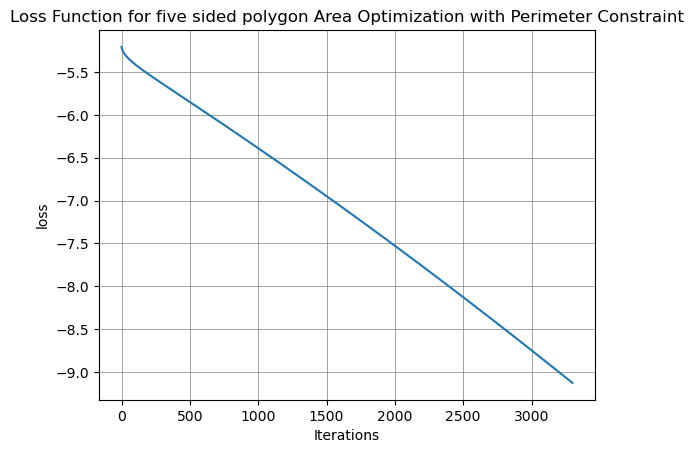

In [6]:
plt.plot(loss_history)
plt.title("Loss Function for five sided polygon Area Optimization with Perimeter Constraint")
plt.xlabel("Iterations")
plt.ylabel("loss")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.savefig("5_loss_history_RMSprop_330000its_lr0.0001_.pdf")